In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

raw_train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
raw_test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
raw_gender_data=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Keep a raw copy of original data
train_data=raw_train_data.copy()
test_data=raw_test_data.copy()
gender_data=raw_gender_data.copy()

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Analysis on gender
train_data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [4]:
train_data.isnull().sum()

train_data['Embarked'].fillna(train_data['Embarked'].mode(),inplace=True)

train_data['Deck'] = train_data['Cabin'].str[0].fillna('U').astype('category')

/tmp/ipykernel_13/2133183852.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode(),inplace=True)


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Deck             0
dtype: int64

In [6]:
test_data.isnull().sum()

test_data['Embarked'].fillna(test_data['Embarked'].mode(),inplace=True)
test_data['Deck'] = test_data['Cabin'].str[0].fillna('U').astype('category')

/tmp/ipykernel_13/1304248048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Embarked'].fillna(test_data['Embarked'].mode(),inplace=True)


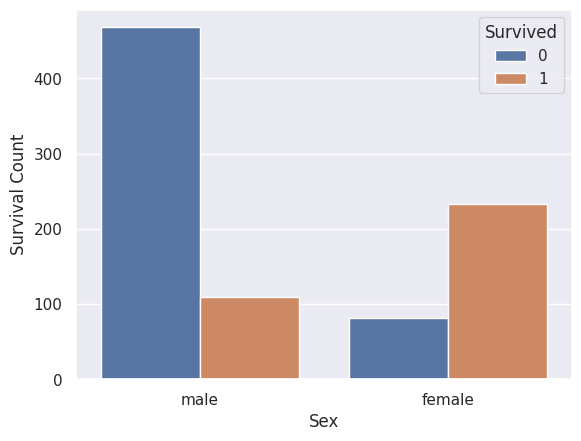

In [7]:

sns.countplot(x = 'Sex', hue = "Survived", data = train_data)
plt.ylabel('Survival Count')
# On first observation,females tends to have a survival rate than male

# Since females have higher chance of survival, we will map females to 1 and males to 0

Sex={'male':0,'female':1}
train_data['Sex']=train_data['Sex'].map(Sex)
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})

Text(0, 0.5, 'Survival Count')

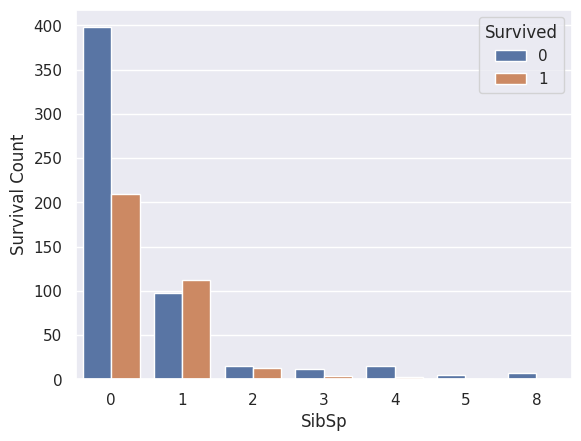

In [8]:
sns.countplot(x = 'SibSp', hue = "Survived", data = train_data)
plt.ylabel('Survival Count')

Text(0, 0.5, 'Survival Count')

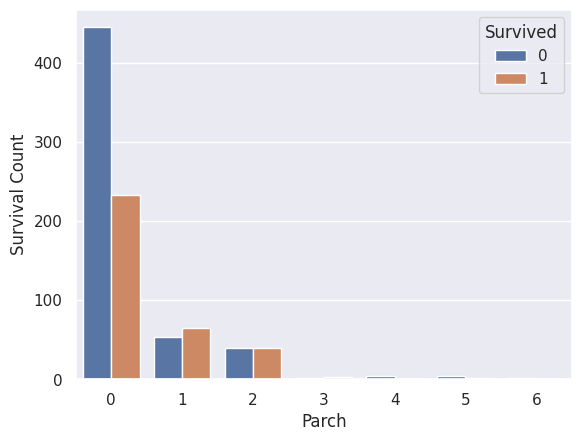

In [9]:
sns.countplot(x = 'Parch', hue = "Survived", data = train_data)
plt.ylabel('Survival Count')


In [10]:
#Enginner Family Size + Alone

train_data['Family']=train_data['SibSp']+train_data['Parch']+1
train_data['Alone']=(train_data['Family']==1).astype(int)

test_data['Family']=test_data['SibSp']+test_data['Parch']+1
test_data['Alone']=(test_data['Family']==1).astype(int)

Text(0, 0.5, 'Survival Count')

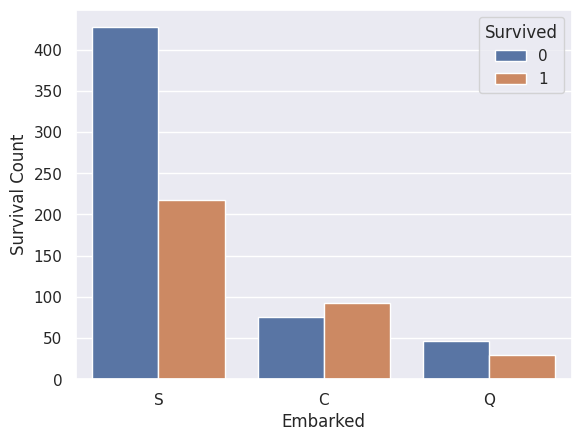

In [11]:
sns.countplot(x = 'Embarked', hue = "Survived", data = train_data)
plt.ylabel('Survival Count')

Text(0, 0.5, 'Survival Count')

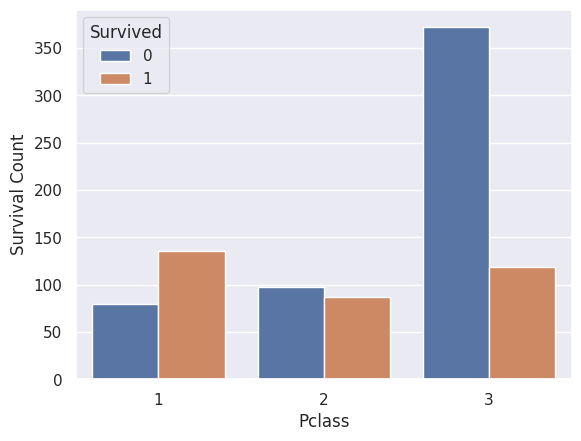

In [12]:
sns.countplot(x = 'Pclass', hue = "Survived", data = train_data)
plt.ylabel('Survival Count')

In [13]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_data['Title'] = train_data['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona','Master','Sir','Mme'], 'Rare'
)
train_data['Title'] = train_data['Title'].replace(['Mlle','Ms','Mrs'], 'Miss')

test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test_data['Title'] = test_data['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona','Master','Sir','Mme'], 'Rare'
)
test_data['Title'] = test_data['Title'].replace(['Mlle','Ms','Mrs'], 'Miss')




train_data['Age'] = train_data.groupby(['Pclass','Title'])['Age'].transform(
    lambda x: x.fillna(x.mean())
)

test_data['Age'] = test_data.groupby(['Pclass','Title'])['Age'].transform(
    lambda x: x.fillna(x.mean())
)

In [14]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Deck         891 non-null    category
 13  Family       891 non-null    int64   
 14  Alone        891 non-null    int64   
 15  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(8), object(5)
memory usage: 105.8+ KB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  Deck         418 non-null    category
 12  Family       418 non-null    int64   
 13  Alone        418 non-null    int64   
 14  Title        418 non-null    object  
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 46.6+ KB


In [16]:
drop_cols = ['PassengerId','Name','Ticket']
X_train = train_data.drop(columns=drop_cols + ['Survived'])
X_test = test_data.drop(columns=drop_cols)
y_train = train_data['Survived']

categorical_cols = ['Title','Embarked','Pclass','Cabin','Deck']
X_train = pd.get_dummies(X_train, columns=categorical_cols, dummy_na=True, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, dummy_na=True, drop_first=True)

In [17]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [18]:

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from bayes_opt import BayesianOptimization

# Define cross-validation function
def xgb_cv(max_depth, learning_rate, subsample, colsample_bytree, gamma, min_child_weight, n_estimators):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'min_child_weight': int(min_child_weight),
        'n_estimators': int(n_estimators),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }
    
    clf = XGBClassifier(**params)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy').mean()
    return score

# Define parameter bounds for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),           # integer
    'learning_rate': (0.01, 0.3),   # float
    'subsample': (0.5, 1),          # float
    'colsample_bytree': (0.5, 1),   # float
    'gamma': (0, 5),                # float
    'min_child_weight': (1, 10),    # integer
    'n_estimators': (100, 500)      # integer
}

# Initialize optimizer
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Run optimization: 5 random initial points, 25 iterations
optimizer.maximize(init_points=5, n_iter=25)

# Retrieve the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['n_estimators'] = int(best_params['n_estimators'])

print("Best parameters found: ", best_params)

# Fit final model with best params
final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('titanic_submission_xgboost_bayes.csv', index=False)


|   iter    |  target   | max_depth | learni... | subsample | colsam... |   gamma   | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------------------
| 2         | 0.8372293 | 5.6217808 | 0.2857071 | 0.8659969 | 0.7993292 | 0.7800932 | 2.4039506 | 123.23344 |
| 3         | 0.8204444 | 9.0632330 | 0.1843233 | 0.8540362 | 0.5102922 | 4.8495492 | 8.4919837 | 184.93564 |
| 4         | 0.8338773 | 4.2727747 | 0.0631873 | 0.6521211 | 0.7623782 | 2.1597250 | 3.6210622 | 344.74115 |
| 5         | 0.8327600 | 3.9764570 | 0.0947219 | 0.6831809 | 0.7280349 | 3.9258798 | 2.7970640 | 305.69377 |
| 6         | 0.8305065 | 7.1469019 | 0.0234706 | 0.8037724 | 0.5852620 | 0.3252579 | 9.5399698 | 486.25281 |
| 7         | 0.8394702 | 5.6586039 | 0.2038963 | 0.8159913 | 0.7865048 | 0.4194151 | 2.4944947 | 122.04870 |
| 8         | 0.8338710 | 6.3464778 | 0.01      | 0.6194386 | 0.8002839 | 0.1398839 | 3.9729354 | 117.14834 |
| 9       